# Chapter 5 - Visualizing what convnets learn

In [34]:
from keras.preprocessing import image
from keras.models import load_model
from keras import models

import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
model = load_model('catas_and_dogs_small_2.h5')
model.summary()

W0506 16:56:28.988605 4456216000 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0506 16:56:29.036722 4456216000 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0506 16:56:29.062401 4456216000 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0506 16:56:29.135071 4456216000 deprecation_wrapper.py:119] From /Users/adriano.gil/.virtualenvs/pydeep/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.

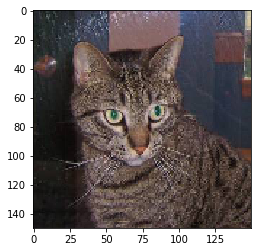

In [19]:
img_path = "/Users/adriano.gil/workspace/datasets/dogs-vs-cats-small/train/cats/cat.1.jpg"

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

plt.imshow(img_tensor[0])
plt.show()

In [23]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [29]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

<Figure size 432x288 with 0 Axes>

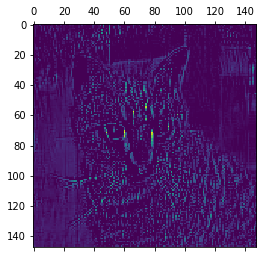

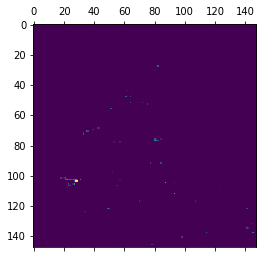

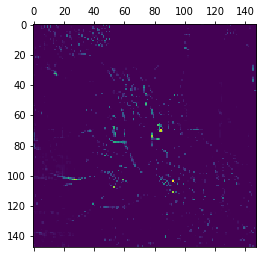

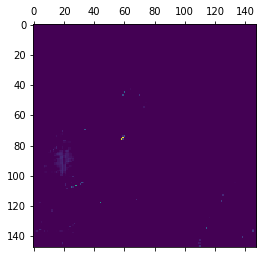

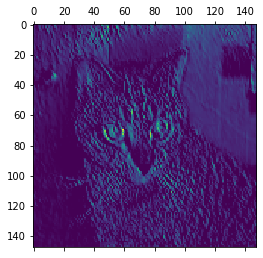

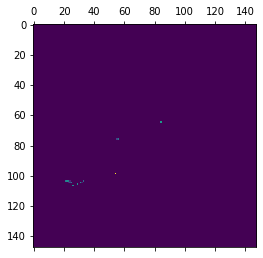

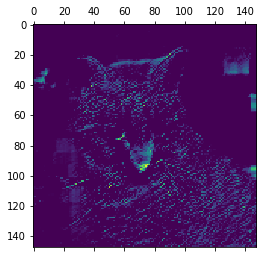

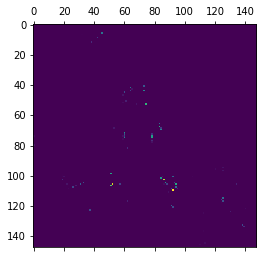

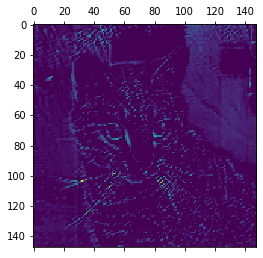

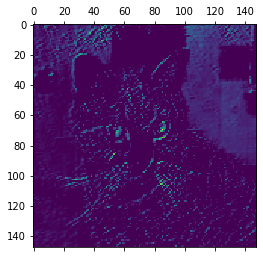

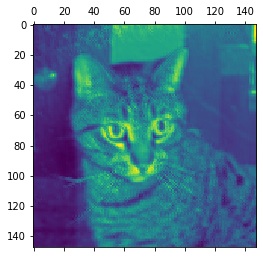

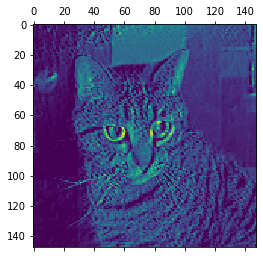

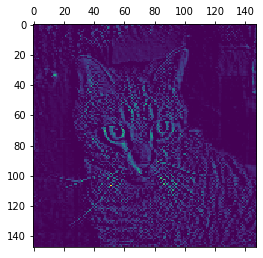

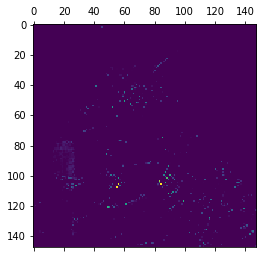

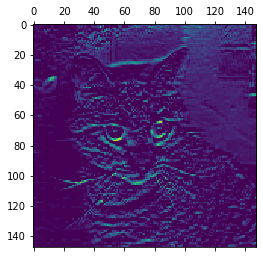

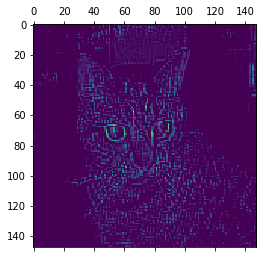

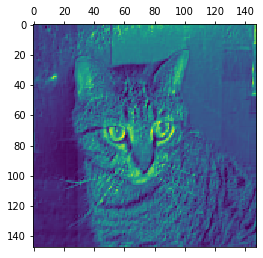

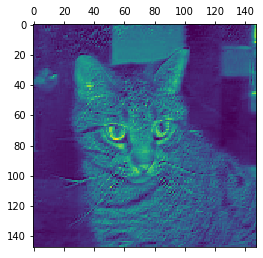

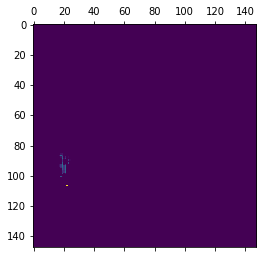

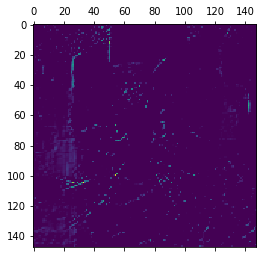

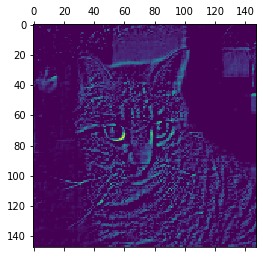

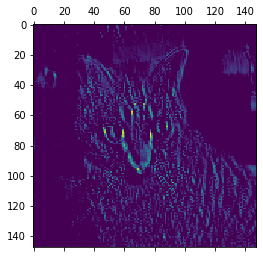

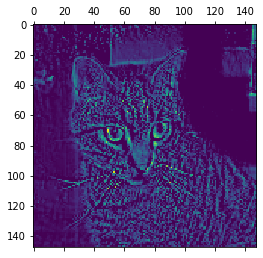

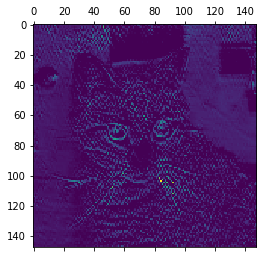

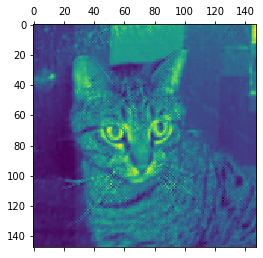

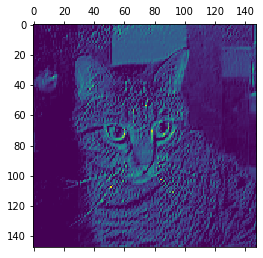

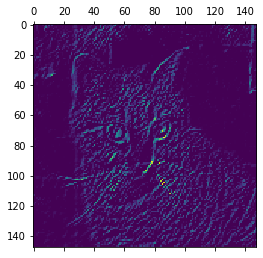

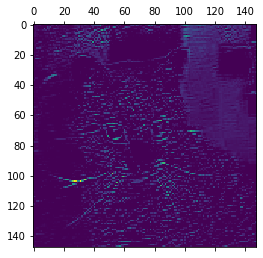

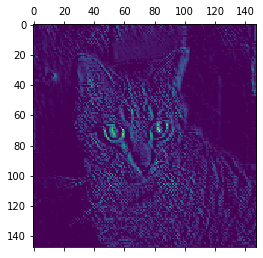

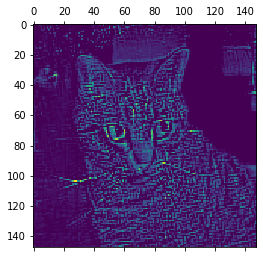

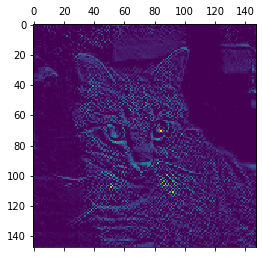

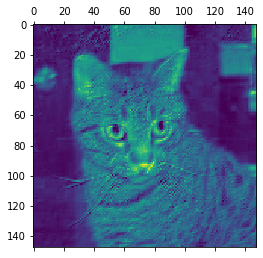

In [44]:
i = 0
for i in range(32):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')